In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Data Understanding and Cleaning

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')

C:\Users\dhruv\AppData\Local\Temp\ipykernel_23352\1795662500.py:1: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')


In [4]:
data.shape

(2622133, 38)

In [5]:
data.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2010,135.0,INTESTINAL INFECTION,0.0,NO PROC,249,"NON-BACTERIAL GASTROENTERITIS, NAUSEA & VOMITING",6,Diseases and Disorders of the Digestive System,1,Minor,Minor,Medical,Blue Cross,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,Not Span/Hispanic,15,Emergency,Home w/ Home Health Services,2010,231.0,OTHER FRACTURE,61.0,OT OR PRCS VES NOT HEAD,912,MUSCULOSKELETAL & OTHER PROCEDURES FOR MULTIPL...,25,Multiple Significant Trauma,3,Major,Extreme,Surgical,Insurance Company,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,Not Span/Hispanic,3,Emergency,Home w/ Home Health Services,2010,42.0,SECONDARY MALIGNANCY,0.0,NO PROC,240,DIGESTIVE MALIGNANCY,6,Diseases and Disorders of the Digestive System,3,Major,Major,Medical,Medicare,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,5,Elective,Home w/ Home Health Services,2010,254.0,REHAB/PROSTH FIT/ADJUST,215.0,OT PHYS THER/REHAB,860,REHABILITATION,23,"Rehabilitation, Aftercare, Other Factors Influ...",2,Moderate,Minor,Medical,Medicare,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,4,Elective,Inpatient Rehabilitation Facility,2010,203.0,OSTEOARTHRITIS,153.0,"HIP REPLACEMENT,TOT/PRT",301,HIP JOINT REPLACEMENT,8,Diseases and Disorders of the Musculoskeletal ...,1,Minor,Minor,Surgical,Medicare,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [7]:
missing_values = data.isnull().sum()
total_rows = data.shape[0]
percentage_missing = (missing_values / total_rows) * 100
percentage_missing

index                                   0.000000
Health Service Area                     0.186375
Hospital County                         0.186375
Operating Certificate Number            0.186375
Facility ID                             0.186375
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     0.122076
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.003928
Discharge Year                          0.000000
CCS Diagnosis Code                      0.086685
CCS Diagnosis Description               0.086685
CCS Procedure Code                      0.086685
CCS Procedure Description               0.086685
APR DRG Code                            0.000000
APR DRG Description 

In [8]:
columns_to_drop = ['index','Other Provider License Number','Abortion Edit Indicator','Discharge Year','Operating Provider License Number']
data = data.drop(columns=columns_to_drop)

In [9]:
null_counts_per_row = data.isnull().sum(axis=1)
max_null_values = 6
data = data[null_counts_per_row < max_null_values]

In [10]:
missing_values = data.isnull().sum()
total_rows = data.shape[0]
percentage_missing = (missing_values / total_rows) * 100
percentage_missing

Health Service Area                     0.021856
Hospital County                         0.021856
Operating Certificate Number            0.021856
Facility ID                             0.021856
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     0.122273
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.003936
CCS Diagnosis Code                      0.058691
CCS Diagnosis Description               0.058691
CCS Procedure Code                      0.058691
CCS Procedure Description               0.058691
APR DRG Code                            0.000000
APR DRG Description                     0.000000
APR MDC Code                            0.000000
APR MDC Description 

In [11]:
data.isnull().sum()

Health Service Area                        572
Hospital County                            572
Operating Certificate Number               572
Facility ID                                572
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3200
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
CCS Diagnosis Code                        1536
CCS Diagnosis Description                 1536
CCS Procedure Code                        1536
CCS Procedure Description                 1536
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Description                          0
APR Severity 

In [12]:
null_rows_check_colunms = ['Patient Disposition','CCS Diagnosis Code','CCS Diagnosis Description','CCS Procedure Code','CCS Procedure Description','Zip Code - 3 digits'
                          ,'APR Severity of Illness Description','APR Risk of Mortality']
data = data.dropna(subset=null_rows_check_colunms)

In [13]:
col = ['Source of Payment 2','Source of Payment 3']
data[col] = data[col].fillna("unused")

In [25]:
data = data.dropna()

In [26]:
data.isnull().sum()

Health Service Area                    0
Hospital County                        0
Operating Certificate Number           0
Facility ID                            0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surg

## Feature Selection 

In [27]:
data.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Source of Payment 1',
       'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

Some features have both Code and Description. So, we can discard the description for the model as we will not need to encode that features.

In [28]:
model_data = data.copy()

In [29]:
columns_to_drop = ['CCS Diagnosis Description','CCS Procedure Description','APR DRG Description','APR MDC Description','APR Severity of Illness Description']
model_data = model_data.drop(columns=columns_to_drop)

In [33]:
model_data.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
5,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,M,White,Not Span/Hispanic,3,Emergency,Home or Self Care,234.0,0.0,930,25,2,Minor,Medical,Insurance Company,Self-Pay,unused,218155.0,0,N,8420.75,3246.34
6,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,M,White,Not Span/Hispanic,4,Emergency,Home w/ Home Health Services,234.0,108.0,930,25,2,Minor,Medical,Medicaid,Self-Pay,unused,207219.0,0,Y,21090.63,6194.34
7,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,242.0,0.0,812,21,2,Minor,Medical,Insurance Company,Self-Pay,unused,244921.0,0,Y,3571.75,1435.34
8,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,229.0,0.0,342,8,1,Minor,Medical,Insurance Company,Self-Pay,unused,242288.0,0,Y,7850.84,2278.30
9,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,143.0,86.0,227,6,1,Minor,Surgical,Other Federal Program,Self-Pay,unused,191936.0,0,N,13787.00,7491.89


In [32]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611433 entries, 5 to 2617245
Data columns (total 28 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Health Service Area                object 
 1   Hospital County                    object 
 2   Operating Certificate Number       float64
 3   Facility ID                        float64
 4   Facility Name                      object 
 5   Age Group                          object 
 6   Zip Code - 3 digits                object 
 7   Gender                             object 
 8   Race                               object 
 9   Ethnicity                          object 
 10  Length of Stay                     object 
 11  Type of Admission                  object 
 12  Patient Disposition                object 
 13  CCS Diagnosis Code                 float64
 14  CCS Procedure Code                 float64
 15  APR DRG Code                       int64  
 16  APR MDC Code      

In [142]:
object_columns = model_data.select_dtypes(include='object').columns
object_columns

Index(['Health Service Area', 'Hospital County', 'Facility Name', 'Age Group',
       'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Source of Payment 1',
       'Source of Payment 2', 'Source of Payment 3',
       'Emergency Department Indicator'],
      dtype='object')

In [149]:
columns_to_label_encode = ['Health Service Area', 'Hospital County',
       'Facility Name','Age Group', 'Gender', 'Race', 'Ethnicity',
       'Type of Admission', 'Patient Disposition','APR Risk of Mortality',
       'APR Medical Surgical Description', 'Source of Payment 1',
       'Source of Payment 2', 'Source of Payment 3','Emergency Department Indicator']
df_encoded = model_data.copy()
for column in columns_to_label_encode:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])

In [153]:
df_encoded['Zip Code - 3 digits'] = pd.to_numeric(df_encoded['Zip Code - 3 digits'], errors='coerce', downcast='integer')
df_encoded['Length of Stay'] = pd.to_numeric(df_encoded['Length of Stay'], errors='coerce', downcast='integer')

In [154]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611433 entries, 5 to 2617245
Data columns (total 28 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Health Service Area                int32  
 1   Hospital County                    int32  
 2   Operating Certificate Number       float64
 3   Facility ID                        float64
 4   Facility Name                      int32  
 5   Age Group                          int32  
 6   Zip Code - 3 digits                float64
 7   Gender                             int32  
 8   Race                               int32  
 9   Ethnicity                          int32  
 10  Length of Stay                     float64
 11  Type of Admission                  int32  
 12  Patient Disposition                int32  
 13  CCS Diagnosis Code                 float64
 14  CCS Procedure Code                 float64
 15  APR DRG Code                       int64  
 16  APR MDC Code      

In [163]:
df_encoded=df_encoded.fillna(0)

In [164]:
df_encoded.isnull().sum()

Health Service Area                  0
Hospital County                      0
Operating Certificate Number         0
Facility ID                          0
Facility Name                        0
Age Group                            0
Zip Code - 3 digits                  0
Gender                               0
Race                                 0
Ethnicity                            0
Length of Stay                       0
Type of Admission                    0
Patient Disposition                  0
CCS Diagnosis Code                   0
CCS Procedure Code                   0
APR DRG Code                         0
APR MDC Code                         0
APR Severity of Illness Code         0
APR Risk of Mortality                0
APR Medical Surgical Description     0
Source of Payment 1                  0
Source of Payment 2                  0
Source of Payment 3                  0
Attending Provider License Number    0
Birth Weight                         0
Emergency Department Indi

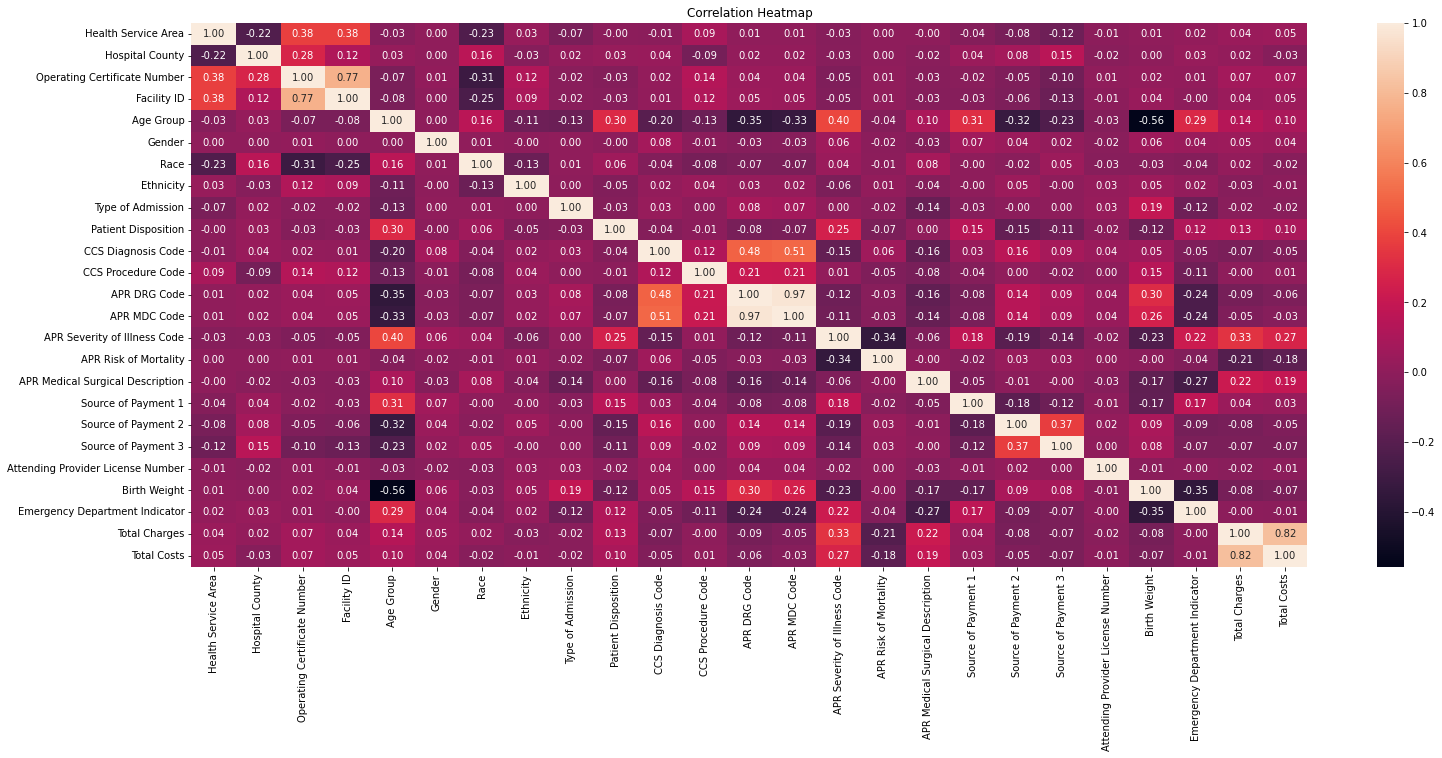

In [52]:
correlation_matrix = df_encoded.corr() 
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## EDA

In [121]:
def plot_categorical_with_percentage(data, col):
    plt.figure(figsize=(15, 6))
    unique_categories = data[col].nunique()
    if unique_categories > 8:
        top_categories = data[col].value_counts().index[:8]
        filtered_data = data[data[col].isin(top_categories)]
    else:
        filtered_data = data

    ax = sns.barplot(x=filtered_data[col].value_counts().index, y=filtered_data[col].value_counts(normalize=True) * 100,palette='Paired')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')
    plt.title(col)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.show()

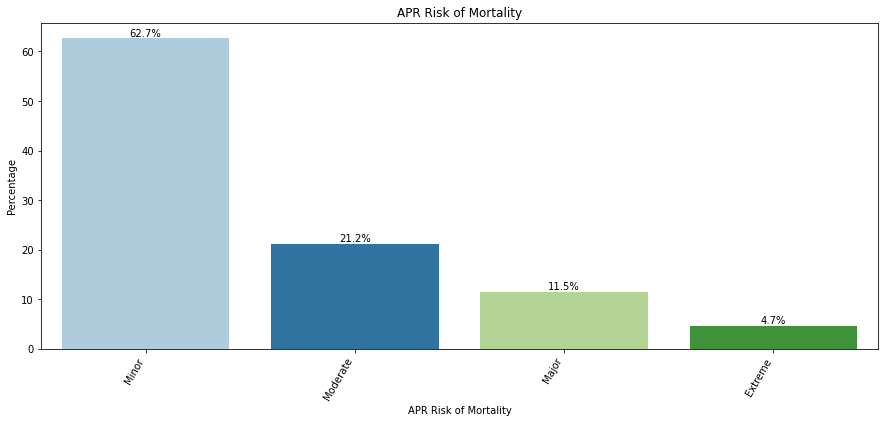

In [122]:
plot_categorical_with_percentage(data, 'APR Risk of Mortality')

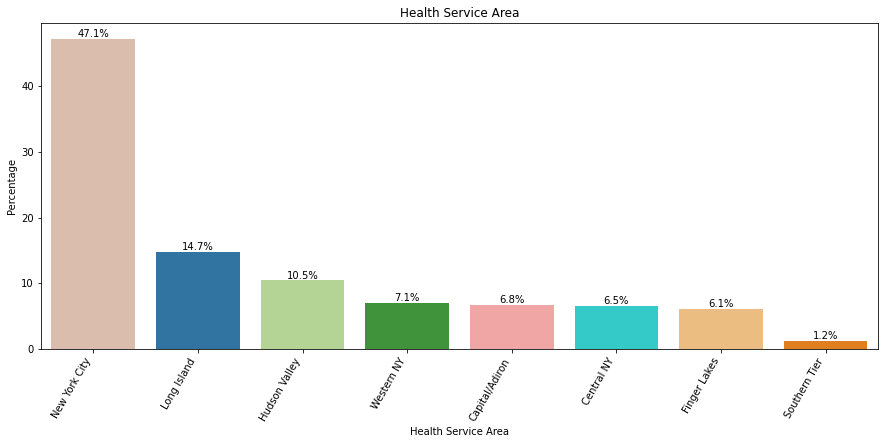

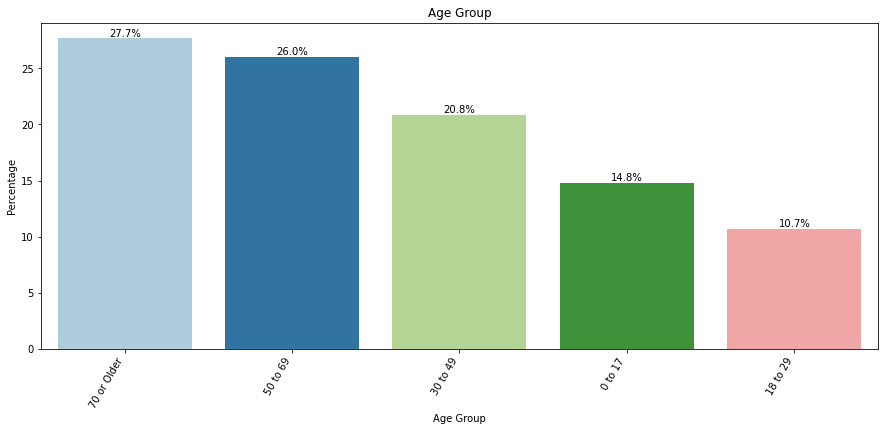

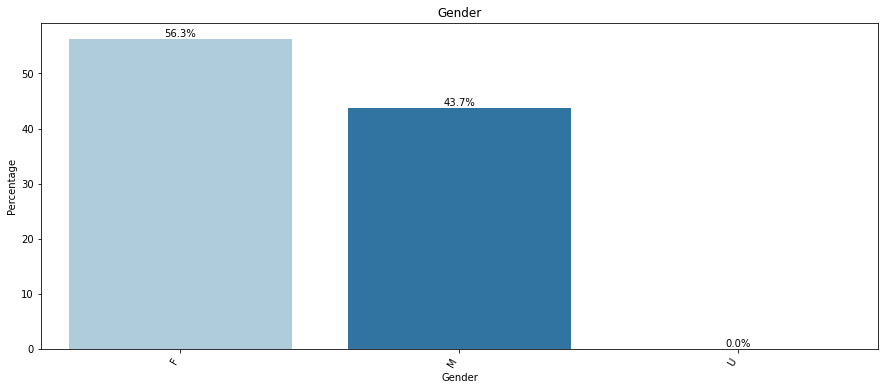

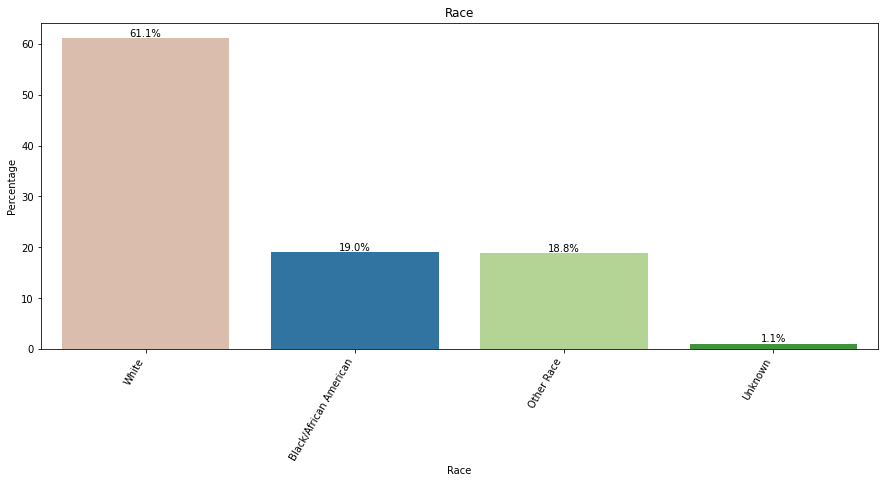

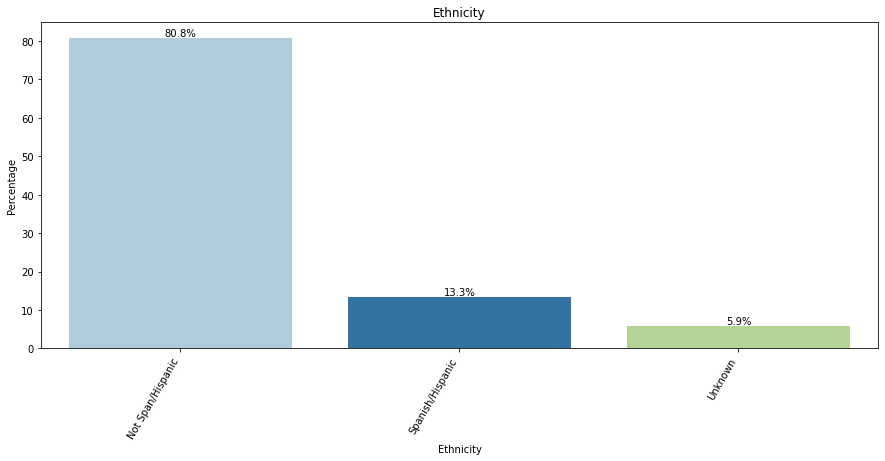

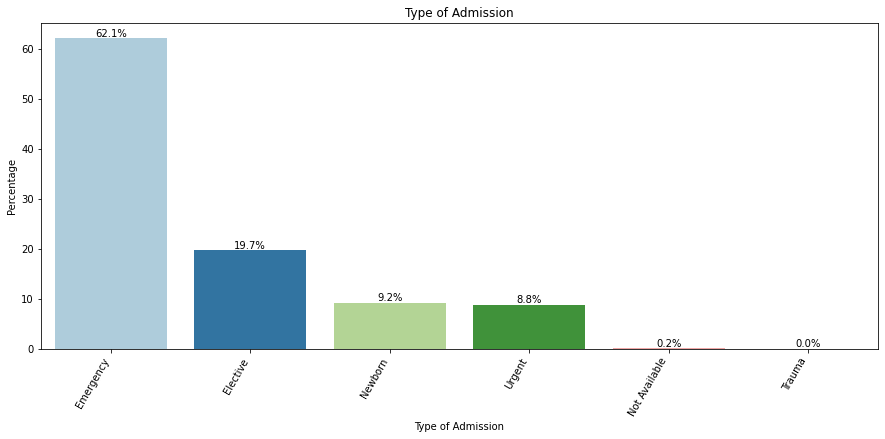

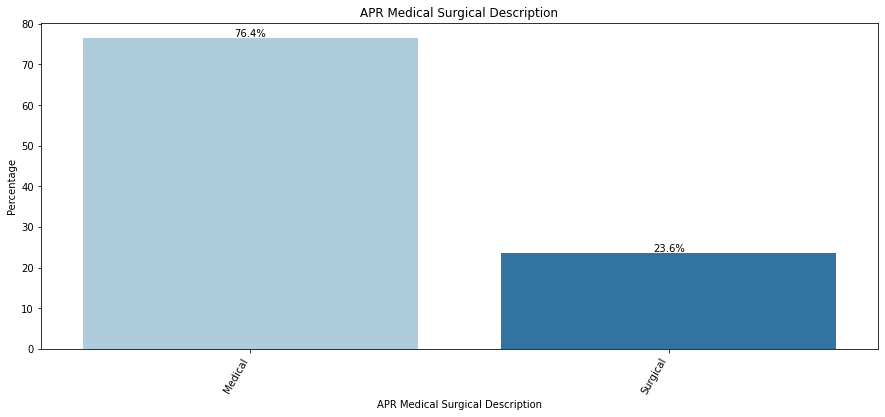

In [123]:
categorical_columns = ["Health Service Area", "Age Group", "Gender", "Race", "Ethnicity", "Type of Admission", "APR Medical Surgical Description"]
for column in categorical_columns:
    plot_categorical_with_percentage(data, column)

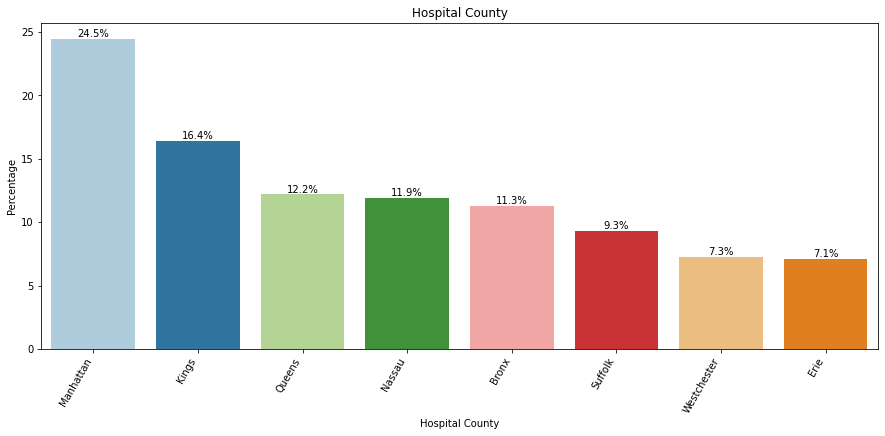

In [124]:
plot_categorical_with_percentage(data, 'Hospital County')

## Models

### Prediction of Risk of Mortality

In [48]:
correlation_matrix['APR Risk of Mortality']

Health Service Area                  0.001424
Hospital County                      0.000562
Operating Certificate Number         0.006289
Facility ID                          0.005333
Age Group                           -0.037146
Gender                              -0.015421
Race                                -0.008459
Ethnicity                            0.010444
Type of Admission                   -0.016605
Patient Disposition                 -0.066518
CCS Diagnosis Code                   0.058951
CCS Procedure Code                  -0.054755
APR DRG Code                        -0.026850
APR MDC Code                        -0.032829
APR Severity of Illness Code        -0.337989
APR Risk of Mortality                1.000000
APR Medical Surgical Description    -0.002185
Source of Payment 1                 -0.023270
Source of Payment 2                  0.029283
Source of Payment 3                  0.025567
Attending Provider License Number    0.003031
Birth Weight                      

In [54]:
X = df_encoded[['CCS Procedure Code','CCS Diagnosis Code','Patient Disposition','APR Severity of Illness Code','Total Charges','Total Costs']]
Y = df_encoded['APR Risk of Mortality']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [61]:
def evaluate_model(name, predictions):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions, average='macro')  # Use 'micro', 'macro', 'weighted', or None
    recall = recall_score(Y_test, predictions, average='macro')  # Use 'micro', 'macro', 'weighted', or None
    f1 = f1_score(Y_test, predictions, average='macro')
    print(f"{name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

### Logistic Regression

In [138]:
logistic_regression_model = LogisticRegression(penalty='l2',max_iter=500,C=0.6)
logistic_regression_model.fit(X_train, Y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test)
evaluate_model("Logistic Regression", logistic_regression_predictions)

C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Evaluation:
Accuracy: 0.64
Precision: 0.41
Recall: 0.34
F1 Score: 0.33



### Decision Tree 

In [62]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_tree_predictions = decision_tree.predict(X_test)
evaluate_model("Decision Tree", decision_tree_predictions)

Decision Tree Evaluation:
Accuracy: 0.72
Precision: 0.60
Recall: 0.60
F1 Score: 0.60



Trying different Max Depth for better accurary

In [74]:
for i in range(5,25,2):
    print("Max Depth :",i)
    decision_tree = DecisionTreeClassifier(criterion="gini",max_depth=i)
    decision_tree.fit(X_train, Y_train)
    decision_tree_predictions = decision_tree.predict(X_test)
    evaluate_model("Decision Tree", decision_tree_predictions)

Max Depth : 5
Decision Tree Evaluation:
Accuracy: 0.75
Precision: 0.65
Recall: 0.60
F1 Score: 0.62

Max Depth : 7
Decision Tree Evaluation:
Accuracy: 0.76
Precision: 0.65
Recall: 0.63
F1 Score: 0.64

Max Depth : 9
Decision Tree Evaluation:
Accuracy: 0.77
Precision: 0.67
Recall: 0.64
F1 Score: 0.65

Max Depth : 11
Decision Tree Evaluation:
Accuracy: 0.78
Precision: 0.67
Recall: 0.65
F1 Score: 0.66

Max Depth : 13
Decision Tree Evaluation:
Accuracy: 0.78
Precision: 0.68
Recall: 0.66
F1 Score: 0.67

Max Depth : 15
Decision Tree Evaluation:
Accuracy: 0.78
Precision: 0.68
Recall: 0.66
F1 Score: 0.67

Max Depth : 17
Decision Tree Evaluation:
Accuracy: 0.78
Precision: 0.68
Recall: 0.66
F1 Score: 0.67

Max Depth : 19
Decision Tree Evaluation:
Accuracy: 0.77
Precision: 0.67
Recall: 0.65
F1 Score: 0.66

Max Depth : 21
Decision Tree Evaluation:
Accuracy: 0.76
Precision: 0.66
Recall: 0.64
F1 Score: 0.65

Max Depth : 23
Decision Tree Evaluation:
Accuracy: 0.76
Precision: 0.65
Recall: 0.63
F1 Score:

### Random Forest

In [78]:
random_forest = RandomForestClassifier(n_estimators=30, max_depth=15)
random_forest.fit(X_train, Y_train)
random_forest_predictions = random_forest.predict(X_test)
evaluate_model("Random Forest", random_forest_predictions)

Random Forest Evaluation:
Accuracy: 0.78
Precision: 0.68
Recall: 0.66
F1 Score: 0.67



### Naive Bayes

In [84]:
naive_bayes = MultinomialNB(alpha = 1)
naive_bayes.fit(X_train, Y_train)
naive_bayes_predictions = naive_bayes.predict(X_test)
evaluate_model("Naive Bayes", naive_bayes_predictions)

Naive Bayes Evaluation:
Accuracy: 0.55
Precision: 0.37
Recall: 0.40
F1 Score: 0.38



### K-Nearest Neighbors

In [137]:
knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)
evaluate_model("K-Nearest Neighbors (KNN)", knn_predictions)

K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.60
Precision: 0.38
Recall: 0.37
F1 Score: 0.37



Trying different number of neighbors for better accuracy

In [139]:
for i in range(20,50,5):
    print('Neighbors :',i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    knn_predictions = knn.predict(X_test)
    evaluate_model("K-Nearest Neighbors (KNN)", knn_predictions)

Neighbors : 20
K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.63
Precision: 0.41
Recall: 0.34
F1 Score: 0.35

Neighbors : 25
K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.63
Precision: 0.42
Recall: 0.34
F1 Score: 0.35

Neighbors : 30
K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.63
Precision: 0.42
Recall: 0.34
F1 Score: 0.34

Neighbors : 35
K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.63
Precision: 0.42
Recall: 0.33
F1 Score: 0.34

Neighbors : 40
K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.63
Precision: 0.42
Recall: 0.33
F1 Score: 0.33

Neighbors : 45
K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.63
Precision: 0.42
Recall: 0.33
F1 Score: 0.33

